In [1]:
from pla import PLA
import numpy as np
import matplotlib.pyplot as plt
pla = PLA()

---
# 15. Implement a version of PLA by visiting examples in the naive cycle using the order of examples in the data set

In [2]:
train_X, train_Y = pla.read_file('hw1_15_train.dat.txt')
pla.train(train_X, train_Y)
print('The number of updates before the algorithm halts is : {0}'.format(pla.num_of_updates))
print('The index fo example that result in the "last" mistake is : {0}'.format(pla.index_of_last_mistake))

The number of updates before the algorithm halts is : 45
The index fo example that result in the "last" mistake is : 135


---
# 16. Implement a version of PLA by visiting examples in fixed, pre-determined random cycles throughout the algorithm

The average number of updates before the algorithm halts is : 40.1315


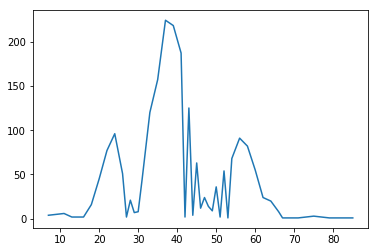

In [3]:
list_of_num_of_updates = np.zeros(2000)
for i in range(2000):
    pla.train(train_X, train_Y, random=True)
    list_of_num_of_updates[i] = pla.num_of_updates
    
print('The average number of updates before the algorithm halts is : {0}'.format(np.mean(list_of_num_of_updates)))
num_of_updates_vs_frequency = {}
for num in list_of_num_of_updates:
    num_of_updates_vs_frequency.setdefault(num, 0)
    num_of_updates_vs_frequency[num]+=1
    
x = []
y = []
for key, val in num_of_updates_vs_frequency.items():
    x.append(key)
    y.append(val)

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()

---
# 17. Implement a version of PLA by visiting examples in fixed, pre-determined random cycles throughout the algorithm, while changing the update rule to be w(t+1) = w(t) + eta*y*x

The average number of updates before the algorithm halts is : 40.4385


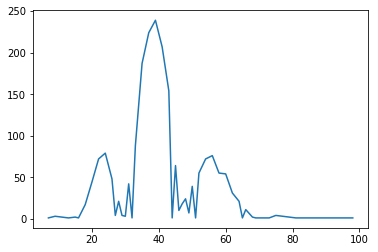

In [4]:
list_of_num_of_updates = np.zeros(2000)
for i in range(2000):
    pla.train(train_X, train_Y, random=True, eta=0.5)
    list_of_num_of_updates[i] = pla.num_of_updates
    
print('The average number of updates before the algorithm halts is : {0}'.format(np.mean(list_of_num_of_updates)))
num_of_updates_vs_frequency = {}
for num in list_of_num_of_updates:
    num_of_updates_vs_frequency.setdefault(num, 0)
    num_of_updates_vs_frequency[num]+=1
    
x = []
y = []
for key, val in num_of_updates_vs_frequency.items():
    x.append(key)
    y.append(val)

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()

- the result with eta=0.5 is almost the same with the result with eta=1
- finding: the eta does not affect the number of updates before the algorithm

---
# 18. Run the pocket algorithm with a total 50 updates on D, and verify the performance of w_pocket using test set

In [5]:
train_X, train_Y = pla.read_file('hw1_18_train.dat.txt')
test_X, test_Y = pla.read_file('hw1_18_test.dat.txt')
list_of_err_rates = np.zeros(2000)
for i in range(2000):
    pla.train_pocket(train_X, train_Y)
    list_of_err_rates[i] = pla.verify_pocket(test_X, test_Y)
    
print('The average error rate on the test set is : {0}'.format(np.mean(list_of_err_rates)))

The average error rate on the test set is : 0.133338


---
# 19. Modify algorithm in Problem 18 to return w50 instead of w_pocket

In [6]:
list_of_err_rates = np.zeros(2000)
for i in range(2000):
    pla.train_pocket(train_X, train_Y)
    list_of_err_rates[i] = pla.verify_pocket(test_X, test_Y, pocket=False)
    
print('The average error rate on the test set is : {0}'.format(np.mean(list_of_err_rates)))

The average error rate on the test set is : 0.356497


- compare to the result of Problem 18, this error rate is higher
- finding: pocket method can get error rate lower

---
# 20. Modify algorithm in Problem 18 to run for 100 updates indstead of 50

In [7]:
list_of_err_rates = np.zeros(2000)
for i in range(2000):
    pla.train_pocket(train_X, train_Y, iteration=100)
    list_of_err_rates[i] = pla.verify_pocket(test_X, test_Y)
    
print('The average error rate on the test set is : {0}'.format(np.mean(list_of_err_rates)))

The average error rate on the test set is : 0.11581000000000002


- compare to the result of Problem 18, this error is lower
- finding: more iterations can get error rate lower